In [1]:
# Name Dipika Sharma
# DSC 530-T301 Data exploration and Analysis
# Week 5

# Assignment 5.2 - (5.1, 5.2, 6.1)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

# load the NSFG pregnancy file

import nsfg
import first
import thinkstats2
import thinkplot

In [5]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


# Exercise 5.1

Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is
roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and
µ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and
6’1” (see http://bluemancasting.com). What percentage of the U.S. male
population is in this range? Hint: use scipy.stats.norm.cdf.

In [6]:
# importing scipy stats package.

import scipy.stats

In [39]:
# loc is mean and scale represent the standard deviation
# Lets assign the mean and standard deviation mentioned in question to some variable.

mean_ = 178
sd_ = 7.7

# to use different methods comes with norm package to analyse normal distribution

dist = scipy.stats.norm(loc=mean_, scale=sd_)
#dist
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [40]:
# Mean and standard deviation of object frozen random variable

dist.mean(), dist.std()

(178.0, 7.7)

In [41]:
# To get the cumulative probability to see percentage of number of people have height below the mean by more than one standard deviation.
dist.cdf(mean_ - sd_)

0.1586552539314574

In [ ]:
# 16% of the people have height below the mean.

In [44]:
# to join Blue man group male height should be between 5'10" (177.8 cm) and 6'1" (185.42 cm)

# people percentage with height below the 5'10 
height_below_1  = dist.cdf(177.8)
height_below_1 # shows 48 % of people have below 5'10"


0.48963902786483265

In [45]:
# people percentage with height below the 6'1"
height_below_2  = dist.cdf(185.42)
height_below_2 # shows 83 % of people have below 6'1"

0.8323858654963063

In [47]:
# subtracting the height_below_1 with height_below_2 will give percentage of people have height below 6'1" and have height greater then 5'10"

height_below_2 - height_below_1

0.3427468376314737

34 percentage of people in a dataset have height in range between 5'10" to 6'1". these percentage of male can join Blue Male group.

# Exercise 5.2 

Exercise 5.2 To get a feel for the Pareto distribution, let’s see how different
the world would be if the distribution of human height were Pareto. With the
parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable
minimum, 1 m, and median, 1.5 m.
Plot this distribution. What is the mean human height in Pareto world?
What fraction of the population is shorter than the mean? If there are 7
billion people in Pareto world, how many do we expect to be taller than 1
km? How tall do we expect the tallest person to be?

In [50]:
# Let assign values given in question to some variables.

alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [51]:
# dist is frozen random variable object. using the object to perform different methods like mean and others.
dist.median()

1.5034066538560549

In [52]:
# Calculating mean

dist.mean()

2.428571428571429

2.42 is the mean of human height in Pareto world

In [53]:
# using CDF to find the percentage of human height below 2.42 which is the mean of the data set.

dist.cdf(dist.mean())

0.778739697565288

77.87 % of population have shorter height then the mean.

In [58]:
# In order to find the human population taller than 1000m that is 1KM.
# lets find out the population shorter than 1000m

dist.cdf(1000)

0.9999920567176528

In [60]:
# Looking at above we have 99% of people who are shorter than 1000m

# Let subtract the above number with 1

num = 1 - dist.cdf(1000) # Lets save the proability in num variable.

In [63]:
# To get the population count lets multiply the fraction with 7 billion
TotalCount = num * 7e9

In [64]:
print("The total pouplation with height taller than 1km is: ",TotalCount)

The total pouplation with height taller than 1km is:  55602.976430479954


In [66]:
# Survivak function is define as 1 - cdf so we can use sf instead of cdf. this will give us same result.
dist.sf(1000)* 7e9

55602.97643069972

In [100]:
# The probability of the tallest person among 7 billion is 1/7e9
# Using the PPF to calculate the height of the tallest person, This will give me height in m.

dist.ppf(1 - 1 / 7e9)

618349.6106759505

This show the tallest person height is 618 km

In [101]:
# Another way to calculate this is using sf function.
# we will assume the tallest person height to be 600 Km
# now we can see how many of the people have height of 600 km among population 7 billion

dist.sf(600000) * 7e9

1.0525455861201714

In [104]:
# Let consider the tallest person height is 620 KM

dist.sf(700000) * 7e9

0.8098999496934656

we can see the number is decreasing from 1 to .8 if increase the tallest person height from 600 km to 700 km so our assumption is closey correct that the tallest person height is near to 600 KM using the sf function.

# Exercise 6.1

Exercise 6.1 The distribution of income is famously skewed to the right. In
this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor
Statistics and the Census Bureau to study income and related variables.
Data collected in 2013 is available from http://www.census.gov/hhes/www/
cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an
Excel spreadsheet with information about household income, and converted
it to hinc06.csv, a CSV file you will find in the repository for this book.
You will also find hinc2.py, which reads this file and transforms the data.
The dataset is in the form of a series of income ranges and the number of
respondents who fell in each range. The lowest range includes respondents
who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.

To estimate mean and other statistics from these data, we have to make some
assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows
one way to model this data. It takes a DataFrame with a column, income,
that contains the upper bound of each range, and freq, which contains the
number of respondents in each frame.
It also takes log_upper, which is an assumed upper bound on the highest
range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is $10^6$
,
or one million dollars.
InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as
the actual data. It assumes that incomes in each range are equally spaced
on a log10 scale.
Compute the median, mean, skewness and Pearson’s skewness of the resulting
sample. What fraction of households reports a taxable income below the
mean? How do the results depend on the assumed upper bound?

In [ ]:
# Defing RawMoment to calculate the Raw Moment.

In [81]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [ ]:
# Defining Mean to calculate the mean.

In [82]:
def Mean(xs):
    return RawMoment(xs, 1)

In [ ]:
# Defining the CentralMoment function to calculate the Central Moment

In [83]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [105]:
# Defining the Var function to calculate the variance

In [106]:
def Var(xs):
    return CentralMoment(xs, 2)

In [107]:
# Function to calculate the Standarized Moment

In [85]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [108]:
# Skewness function to calculate the skew

In [109]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [110]:
# Defining the Median function to calcuate the median

In [87]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [111]:
# Defining the PearsonMedianSkewness

In [112]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [113]:
# Defining the InterpolateSample

In [114]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample



In [115]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

In [116]:
import hinc
income_df = hinc.ReadData()

In [127]:
# Showing the first 5 rows of dataset.

income_df.head()

,income,freq,cumsum,ps,log_upper,log_lower
0,4999.0,4204,4204,0.034330,3.698883,3.000000
1,9999.0,4729,8933,0.072947,3.999957,3.698883
2,14999.0,6982,15915,0.129963,4.176062,3.999957
3,19999.0,7157,23072,0.188407,4.301008,4.176062
4,24999.0,7131,30203,0.246640,4.397923,4.301008


In [120]:
# Calling Interpolatesample function passing income dataframe and log_upper as parameter to get log_sample in return

log_sample = InterpolateSample(income_df, log_upper=6.0)

In [121]:
log_sample # generates a pseudo-sample that is, a sample of household incomes that yields the same number of respondents in each range as the actual data

array([3.        , 3.00016628, 3.00033256, ..., 5.99958621, 5.99979311,
       6.        ])

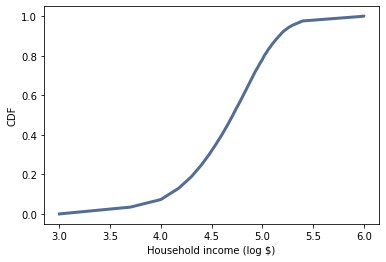

In [119]:
# Plotting log_sample we get from Interpolatesample function.

log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [137]:
# return the array

sample = np.power(10, log_sample)

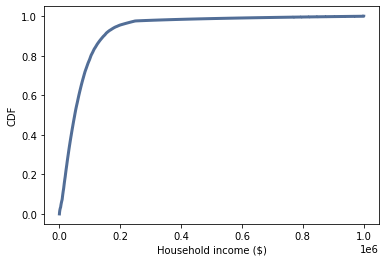

In [140]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')



In [141]:
# Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. 
# What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?
# calculating the mean and median of the sample

Mean(sample), Median(sample)

(74278.70753118733, 51226.45447894046)

In [142]:
# Calculating the skewness ans PearsonMedian Skewness of sample
# Skewness will help us in find out the asymmetry of the distribution
# Since ot is poaitive, it means the tail is on the right.

Skewness(sample), PearsonMedianSkewness(sample)

(4.949920244429583, 0.7361258019141782)

In [144]:
# calculating cdf to measure the probability of the household that have less income from the mean.

cdf.Prob(Mean(sample))

0.660005879566872

66% of the population earn less income than the mean

All the baove calculation ae done on the basis of the asumption that the highest inclome 10 million dollars or 10^6 dollars but since it is an asuption this might not be correct. In order to determine how strong the skew is, it is must we have all the information of the distribution.